In [4]:
import pandas as pd
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt

In [2]:
data_dir = Path('D:')
table = pd.read_csv(data_dir / 'temp_240722.csv')

In [24]:
b1_values = table.values[:,::2]
b1_values_norm = b1_values / b1_values[:,0][:, None]

In [25]:
b1_values_norm

array([[1.        , 0.96666667, 0.9       , 0.85      , 0.78333333,
        0.71666667, 0.65      , 0.58333333, 0.51666667, 0.46666667,
        0.41666667],
       [1.        , 0.96969697, 0.90909091, 0.81212121, 0.73333333,
        0.64848485, 0.55757576, 0.48484848, 0.4       , 0.32727273,
        0.26060606],
       [1.        , 0.95864662, 0.88345865, 0.80451128, 0.71052632,
        0.62781955, 0.53383459, 0.45488722, 0.36842105, 0.30075188,
        0.23308271],
       [1.        , 0.95135135, 0.87837838, 0.79189189, 0.7027027 ,
        0.61621622, 0.52702703, 0.44324324, 0.35675676, 0.28378378,
        0.21621622],
       [1.        , 0.94725738, 0.87130802, 0.78691983, 0.69620253,
        0.60970464, 0.51687764, 0.43459916, 0.34810127, 0.27848101,
        0.21097046],
       [1.        , 0.94156928, 0.86644407, 0.78130217, 0.69115192,
        0.60434057, 0.51585977, 0.42904841, 0.34390651, 0.2687813 ,
        0.20200334],
       [1.        , 0.93723849, 0.86331939, 0.77684798, 0.

Text(0.5, 1.0, 'Meso.1 (6/7/2024)')

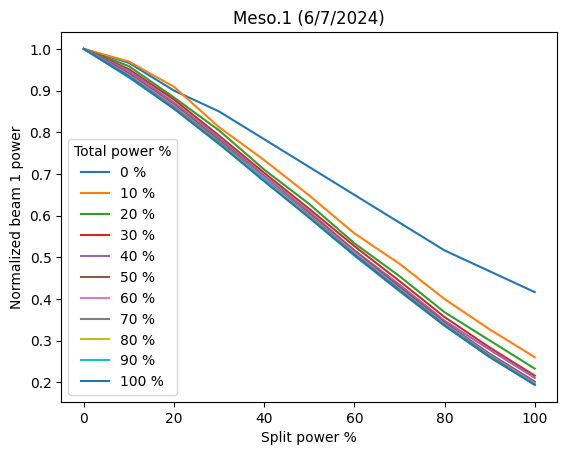

In [26]:
fig, ax = plt.subplots()
for i in range(0, b1_values_norm.shape[0]):
    ax.plot(b1_values_norm[i,:], label=f'{i*10} %')
ax.set_xticks(range(0, 11,2))
ax.set_xticklabels([f'{i*10}' for i in range(0, 11,2)])
ax.legend(title='Total power %')
ax.set_xlabel('Split power %')
ax.set_ylabel('Normalized beam 1 power')
ax.set_title('Meso.1 (6/7/2024)')

In [27]:
b1_values[-1,:]

array([126.3, 117.9, 108.2,  97.6,  86.2,  75.2,  63.9,  53.1,  42.5,
        33. ,  24.5])

Text(0.5, 1.0, 'Meso.1 (6/7/2024)')

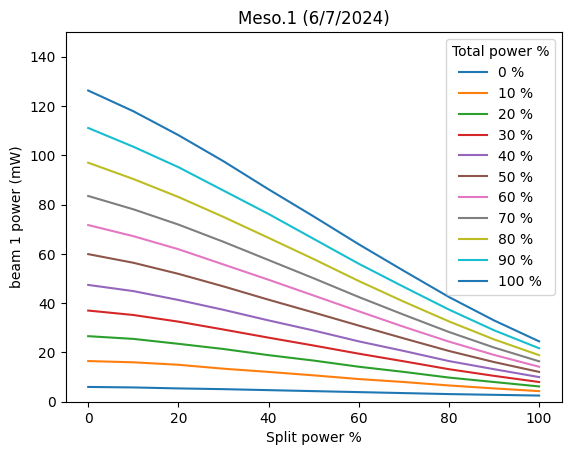

In [43]:
fig, ax = plt.subplots()
for i in range(0, b1_values.shape[0]):
    ax.plot(b1_values[i,:], label=f'{i*10} %')
# ax.axhline(b1_values[-1,-1], color='black', linestyle='--') # visual illusion
ax.set_xticks(range(0, 11,2))
ax.set_xticklabels([f'{i*10}' for i in range(0, 11,2)])
ax.legend(title='Total power %')
ax.set_xlabel('Split power %')
ax.set_ylabel('beam 1 power (mW)')
ax.set_ylim(0, 150)
ax.set_title('Meso.1 (6/7/2024)')

In [35]:
# Estimation using total power mW and split ratio
total_power = table.values[:,1::2]
est_b1 = total_power * (1-np.linspace(0,1,11))


Text(0.5, 1.0, 'Meso.1 Estimated from split % (6/7/2024)')

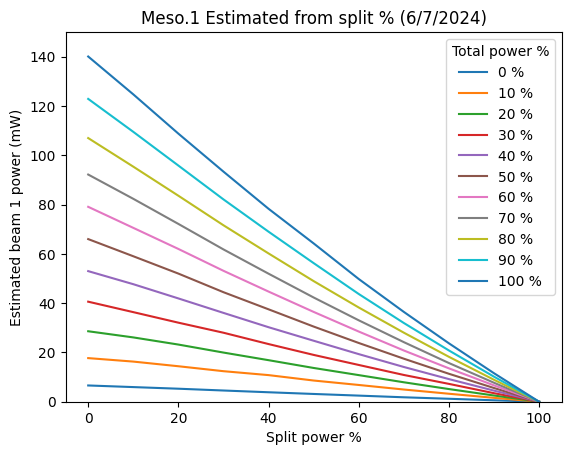

In [44]:
fig, ax = plt.subplots()
for i in range(0, est_b1.shape[0]):
    ax.plot(est_b1[i,:], label=f'{i*10} %')
# ax.axhline(b1_values[-1,-1], color='black', linestyle='--') # visual illusion
ax.set_xticks(range(0, 11,2))
ax.set_xticklabels([f'{i*10}' for i in range(0, 11,2)])
ax.legend(title='Total power %')
ax.set_xlabel('Split power %')
ax.set_ylabel('Estimated beam 1 power (mW)')
ax.set_ylim(0, 150)
ax.set_title('Meso.1 Estimated from split % (6/7/2024)')

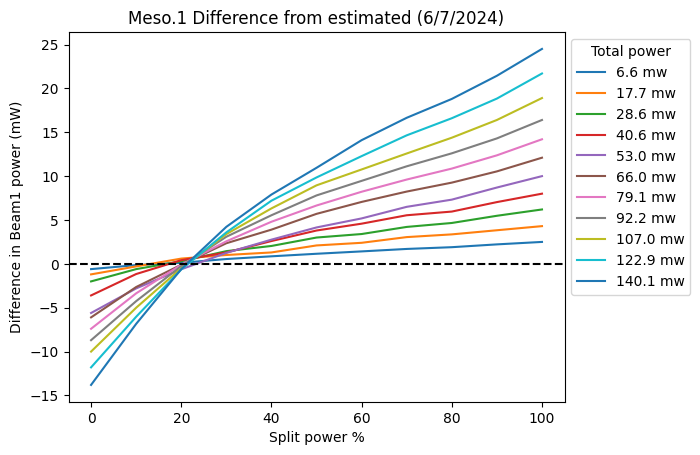

In [45]:
# Plot the difference
diff_power = b1_values - est_b1
fig, ax = plt.subplots()
for i in range(0, diff_power.shape[0]):
    ax.plot(diff_power[i,:], label=f'{total_power[i,0]} mw')
# ax.axhline(b1_values[-1,-1], color='black', linestyle='--') # visual illusion
ax.set_xticks(range(0, 11,2))
ax.set_xticklabels([f'{i*10}' for i in range(0, 11,2)])
ax.legend(title='Total power', loc='upper left', bbox_to_anchor=(1,1))
ax.set_xlabel('Split power %')
ax.set_ylabel('Difference in Beam1 power (mW)')
ax.set_title('Meso.1 Difference from estimated (6/7/2024)')
ax.axhline(0, color='black', linestyle='--')


(-12.5, 262.5, -0.3828674074362608, 22.160843029974895)

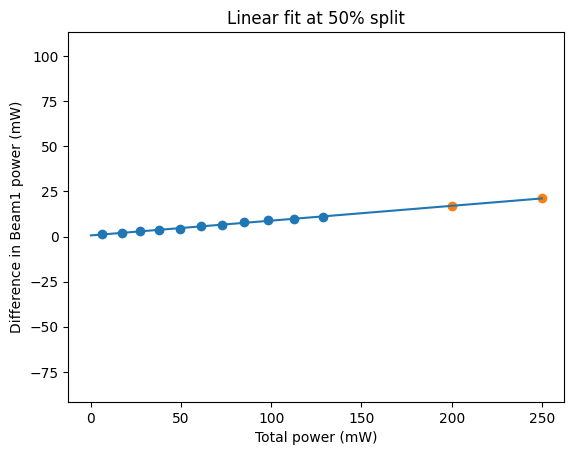

In [95]:
# Extrapolating the total power
# to 200 and 250 mW
# at 0, 10, 20, 30, 40, and 50% split


split_power_pct = np.linspace(0, 50, 6)
split_i = 5
total_power_temp = total_power[:,split_i]
power_diff_temp = diff_power[:,split_i]
coeff = np.polyfit(total_power_temp, power_diff_temp, 1)

fig, ax = plt.subplots()
ax.scatter(total_power_temp, power_diff_temp)
sim_total_power_range = [0, 250]
ax.plot(sim_total_power_range, np.polyval(coeff, sim_total_power_range))
ax.scatter([200, 250], np.polyval(coeff, [200, 250]))
ax.set_xlabel('Total power (mW)')
ax.set_ylabel('Difference in Beam1 power (mW)')
ax.set_title(f'Linear fit at {int(split_power_pct[split_i])}% split')
ax.axis('equal')

In [99]:
diff_power_fit

array([[ 3.81412287e-01, -4.59308593e+00, -9.56758415e+00,
        -1.45420824e+01, -1.95165806e+01, -2.44910788e+01],
       [ 4.36501032e-01,  1.83227508e-02, -3.99855530e-01,
        -8.18033811e-01, -1.23621209e+00, -1.65439037e+00],
       [ 2.81713194e-01,  3.24257042e+00,  6.20342764e+00,
         9.16428487e+00,  1.21251421e+01,  1.50859993e+01],
       [ 5.19312385e-01,  5.90890594e+00,  1.12984995e+01,
         1.66880931e+01,  2.20776866e+01,  2.74672802e+01],
       [ 7.32162457e-01,  8.28407375e+00,  1.58359850e+01,
         2.33878963e+01,  3.09398076e+01,  3.84917189e+01],
       [ 1.06672717e+00,  1.13321983e+01,  2.15976693e+01,
         3.18631404e+01,  4.21286115e+01,  5.23940826e+01]])

In [101]:
diff_power

array([[ -0.6 ,  -0.14,   0.12,   0.55,   0.86,   1.15,   1.42,   1.7 ,
          1.9 ,   2.22,   2.5 ],
       [ -1.2 ,  -0.29,   0.6 ,   1.01,   1.3 ,   2.1 ,   2.4 ,   3.05,
          3.36,   3.83,   4.3 ],
       [ -2.  ,  -0.6 ,   0.3 ,   1.45,   2.04,   3.  ,   3.4 ,   4.21,
          4.66,   5.48,   6.2 ],
       [ -3.6 ,  -1.16,   0.42,   1.3 ,   2.6 ,   3.8 ,   4.58,   5.54,
          5.96,   7.04,   8.  ],
       [ -5.6 ,  -2.8 ,  -0.62,   1.25,   2.76,   4.15,   5.18,   6.5 ,
          7.32,   8.7 ,  10.  ],
       [ -6.1 ,  -2.64,  -0.1 ,   2.35,   3.9 ,   5.7 ,   7.06,   8.24,
          9.26,  10.54,  12.1 ],
       [ -7.4 ,  -3.36,  -0.1 ,   2.57,   4.8 ,   6.65,   8.22,   9.61,
         10.86,  12.37,  14.2 ],
       [ -8.7 ,  -4.25,  -0.26,   3.09,   5.54,   7.8 ,   9.46,  11.12,
         12.6 ,  14.3 ,  16.4 ],
       [-10.  ,  -5.  ,  -0.5 ,   3.39,   6.32,   8.95,  10.76,  12.58,
         14.38,  16.4 ,  18.9 ],
       [-11.8 ,  -6.03,  -0.64,   3.59,   7.2 ,   9.85,

In [102]:
total_power

array([[  6.6,   6.6,   6.6,   6.5,   6.4,   6.3,   6.2,   6. ,   6. ,
          5.8,   5.8],
       [ 17.7,  18.1,  18. ,  17.7,  18. ,  17.2,  17. ,  16.5,  16.2,
         15.7,  15.7],
       [ 28.6,  29. ,  29. ,  28.5,  28.1,  27.4,  27. ,  26.3,  25.7,
         25.2,  24.8],
       [ 40.6,  40.4,  40.1,  40. ,  39. ,  38. ,  37.3,  36.2,  36.2,
         34.6,  34.2],
       [ 53. ,  53. ,  52.4,  51.5,  50.4,  49.5,  48.3,  47. ,  45.9,
         45. ,  43.6],
       [ 66. ,  65.6,  65. ,  63.5,  62.5,  61. ,  59.6,  58.2,  56.7,
         55.6,  54.4],
       [ 79.1,  78.4,  77.5,  75.9,  74.5,  72.9,  71.2,  69.3,  67.7,
         66.3,  65.1],
       [ 92.2,  91.5,  90.2,  88.3,  86.6,  84.6,  82.6,  80.6,  78.5,
         77. ,  75.4],
       [107. , 106. , 104.5, 102.3, 100.3,  97.9,  95.6,  93.4,  91.1,
         89. ,  86.9],
       [122.9, 121.7, 119.8, 117.3, 115. , 112.5, 109.3, 106.5, 104. ,
        101.6,  99.6],
       [140.1, 138.6, 136. , 133.4, 130.5, 128.5, 124.5, 121

Text(0.5, 0, 'Split power (%)')

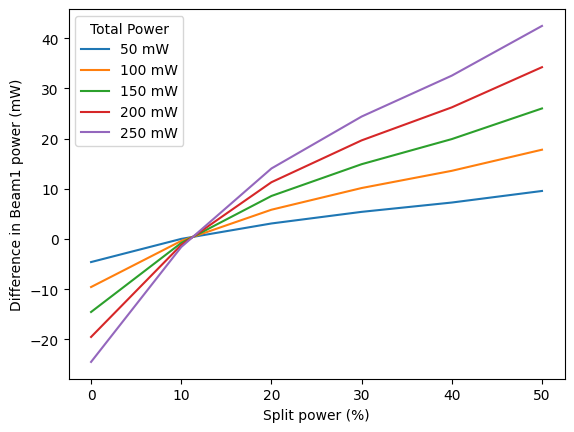

In [112]:
# add 200 and 250 mW to the table
# with 50 mW intervals
diff_power_fit = []
power_x = np.linspace(50, 250, 5)
for split_i in range(0, 11, 2):
    total_power_temp = total_power[:,0]
    power_diff_temp = diff_power[:,split_i]
    coeff = np.polyfit(total_power_temp, power_diff_temp, 1)
    if len(diff_power_fit) == 0:
        diff_power_fit = np.polyval(coeff, power_x)
    else:
        diff_power_fit = np.vstack([diff_power_fit, np.polyval(coeff, power_x)])
    

fig, ax = plt.subplots()
for i in range(0, diff_power_fit.shape[1]):
    ax.plot(diff_power_fit[:,i], label=f'{int(power_x[i])} mW')
ax.legend(title='Total Power')
ax.set_ylabel('Difference in Beam1 power (mW)')
ax.set_xticks(range(0, 6,1))
ax.set_xticklabels([f'{i*10}' for i in range(0, 6,1)])
ax.set_xlabel('Split power (%)')


In [121]:
# in percentage, per desired power to the plane (Ch1)
target_power_b1 = []
for p in power_x:
    target_power_b1.append(p*(1-np.linspace(0,0.5,6)))
target_power_b1 = np.stack(target_power_b1)
error_power_pct_b1 = (diff_power_fit.T / target_power_b1) * 100
target_power_b2 = []
for p in power_x:
    target_power_b2.append(p*np.linspace(0,0.5,6))
target_power_b2 = np.stack(target_power_b2)
error_power_pct_b2 = (diff_power_fit.T / target_power_b2) * 100

C:\Users\jinho.kim\AppData\Local\Temp\ipykernel_11680\808174936.py:11: RuntimeWarning: divide by zero encountered in divide
  error_power_pct_b2 = (diff_power_fit.T / target_power_b2) * 100


In [126]:
target_power_b1

array([[ 50.,  45.,  40.,  35.,  30.,  25.],
       [100.,  90.,  80.,  70.,  60.,  50.],
       [150., 135., 120., 105.,  90.,  75.],
       [200., 180., 160., 140., 120., 100.],
       [250., 225., 200., 175., 150., 125.]])

In [128]:
42/125

0.336

In [127]:
diff_power_fit.T

array([[-4.59308593e+00,  2.44703970e-02,  3.09583278e+00,
         5.40990947e+00,  7.26669121e+00,  9.57180848e+00],
       [-9.56758415e+00, -3.80135679e-01,  5.83524383e+00,
         1.01574551e+01,  1.35881821e+01,  1.77931301e+01],
       [-1.45420824e+01, -7.84741756e-01,  8.57465488e+00,
         1.49050006e+01,  1.99096729e+01,  2.60144516e+01],
       [-1.95165806e+01, -1.18934783e+00,  1.13140659e+01,
         1.96525462e+01,  2.62311637e+01,  3.42357732e+01],
       [-2.44910788e+01, -1.59395391e+00,  1.40534770e+01,
         2.44000918e+01,  3.25526546e+01,  4.24570948e+01]])

In [129]:
error_power_pct_b1

array([[-9.18617186,  0.05437866,  7.73958194, 15.45688421, 24.22230404,
        38.2872339 ],
       [-9.56758415, -0.42237298,  7.29405479, 14.51065008, 22.64697009,
        35.58626012],
       [-9.69472158, -0.58129019,  7.14554574, 14.1952387 , 22.12185877,
        34.68593552],
       [-9.7582903 , -0.6607488 ,  7.07129121, 14.03753302, 21.85930311,
        34.23577322],
       [-9.79643152, -0.70842396,  7.02673849, 13.9429096 , 21.70176971,
        33.96567585]])

Text(0.5, 1.0, 'Meso.1 (6/7/2024)')

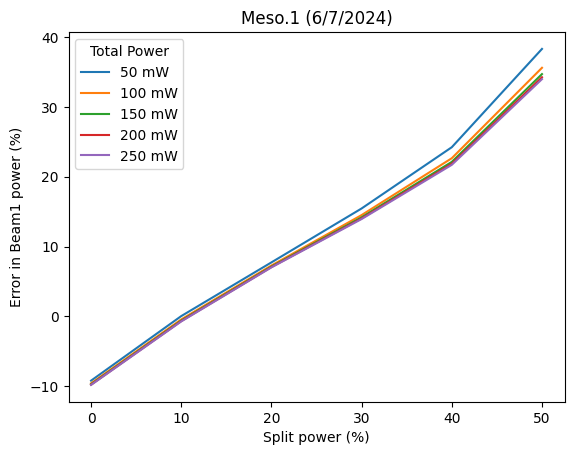

In [122]:
fig, ax = plt.subplots()
for i in range(0, error_power_pct_b1.shape[0]):
    ax.plot(error_power_pct_b1[i,:], label=f'{int(power_x[i])} mW')
ax.legend(title='Total Power')
ax.set_ylabel('Error in Beam1 power (%)')
ax.set_xticks(range(0, 6,1))
ax.set_xticklabels([f'{i*10}' for i in range(0, 6,1)])
ax.set_xlabel('Split power (%)')
ax.set_title('Meso.1 (6/7/2024)')


Text(0.5, 1.0, 'Meso.1 (6/7/2024)')

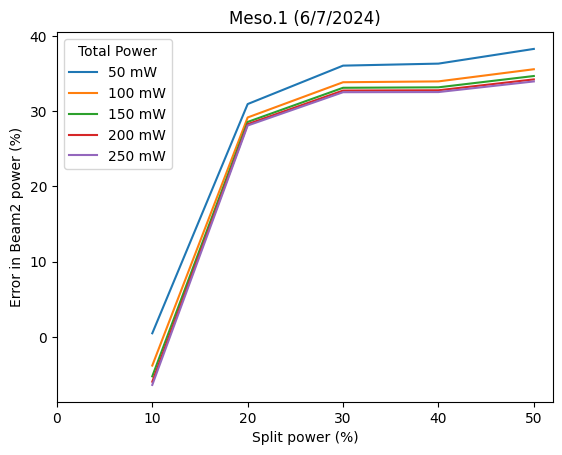

In [123]:
fig, ax = plt.subplots()
for i in range(0, error_power_pct_b2.shape[0]):
    ax.plot(error_power_pct_b2[i,:], label=f'{int(power_x[i])} mW')
ax.legend(title='Total Power')
ax.set_ylabel('Error in Beam2 power (%)')
ax.set_xticks(range(0, 6,1))
ax.set_xticklabels([f'{i*10}' for i in range(0, 6,1)])
ax.set_xlabel('Split power (%)')
ax.set_title('Meso.1 (6/7/2024)')

In [79]:
# Look at Beam2 (total - Beam1)
b2_values = table.values[:,1::2] - b1_values
b2_values

array([[ 0.6,  0.8,  1.2,  1.4,  1.7,  2. ,  2.3,  2.5,  2.9,  3. ,  3.3],
       [ 1.2,  2.1,  3. ,  4.3,  5.9,  6.5,  7.8,  8.5,  9.6, 10.3, 11.4],
       [ 2. ,  3.5,  5.5,  7.1,  9.2, 10.7, 12.8, 14.2, 15.9, 17.2, 18.6],
       [ 3.6,  5.2,  7.6, 10.7, 13. , 15.2, 17.8, 19.8, 23. , 24.1, 26.2],
       [ 5.6,  8.1, 11.1, 14.2, 17.4, 20.6, 23.8, 26.4, 29.4, 31.8, 33.6],
       [ 6.1,  9.2, 13.1, 16.7, 21.1, 24.8, 28.7, 32.5, 36.1, 39.5, 42.3],
       [ 7.4, 11.2, 15.6, 20.2, 25. , 29.8, 34.5, 38.9, 43.3, 47.3, 50.9],
       [ 8.7, 13.4, 18.3, 23.4, 29.1, 34.5, 40.1, 45.3, 50.2, 55. , 59. ],
       [10. , 15.6, 21.4, 27.3, 33.8, 40. , 46.6, 52.8, 58.5, 63.7, 68. ],
       [11.8, 18.2, 24.6, 31.6, 38.8, 46.4, 53.3, 59.9, 66.6, 72.6, 77.9],
       [13.8, 20.7, 27.8, 35.8, 44.3, 53.3, 60.6, 68.4, 76. , 82.6, 88.9]])

In [91]:
total_power = table.values[:,1::2]
est_b2 = total_power * np.linspace(0,1,11)
diff_power_b2 = b2_values - est_b2
assert ((diff_power_b2 + diff_power) < 1e-10).all()

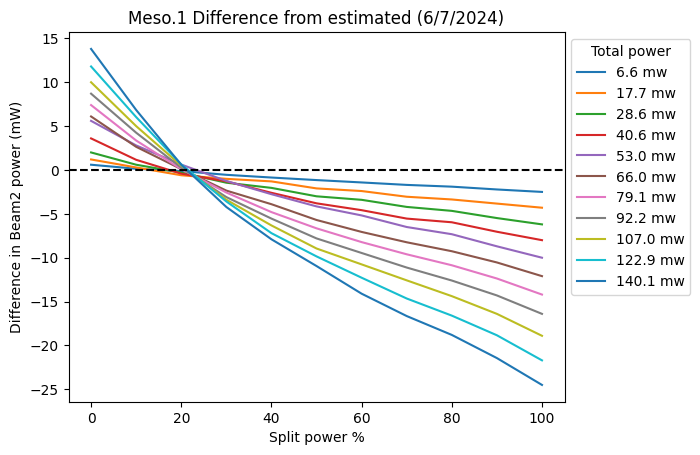

In [92]:
# Plot the difference
fig, ax = plt.subplots()
for i in range(0, diff_power.shape[0]):
    ax.plot(diff_power_b2[i,:], label=f'{total_power[i,0]} mw')
# ax.axhline(b1_values[-1,-1], color='black', linestyle='--') # visual illusion
ax.set_xticks(range(0, 11,2))
ax.set_xticklabels([f'{i*10}' for i in range(0, 11,2)])
ax.legend(title='Total power', loc='upper left', bbox_to_anchor=(1,1))
ax.set_xlabel('Split power %')
ax.set_ylabel('Difference in Beam2 power (mW)')
ax.set_title('Meso.1 Difference from estimated (6/7/2024)')
ax.axhline(0, color='black', linestyle='--')

In [ ]:
# plot